In [1]:
# Importa as Bibliotecas

import pandas as pd               # MANIPULAR E TRATAR DADOS
import matplotlib.pyplot as plt   # GERAR GRAFICOS
import os                         # GERENCIAR O SISTEMA OPERACIONAL
import seaborn as sns             # VISUALIZAR DADOS DE FORMA GRAFICA

### CARREGAR OS ARQUIVOS DE VENDAS

In [10]:
# PASTA QUE CONTÉM TODOS OS ARQUIVOS
caminhoDaPasta = 'C:\\Users\\FIC\\Documents\\Adriano Python\\desafio-python-Adriano\\Desafio 01 - Super Atacadista\\arquivos\\vendas\\'

### AGRUPAR TODOS OS DOCUMENTOS EM UM ÚNICO DATAFRAME ###

diretorios = []  # Lista Vazia


# LOCALIZAR OS ARQUIVOS E COMBINAR O CAMINHO DA PASTA
for file in os.listdir (caminhoDaPasta):
    fullPath = caminhoDaPasta + file
    diretorios.append(fullPath)

# CRIAR UM DATAFRAME VAZIO
dfVendas = pd.DataFrame()

# LOOP PARA ACESSAR OS DUCUMENTOS E COMBINA-LOS(+/- UNION DO SQL)

for path in diretorios:
    df = pd.read_excel(path)
    dfVendas = pd.concat([dfVendas,df])

# GERAR UM ARQUIVO CSV COM OS DADOS CONSOLIDADOS
dfVendas.to_csv(caminhoDaPasta + 'arquivoCombinado.csv')



### Carregar os demais dataframes

In [23]:
dfMetas = pd.read_excel('C:\\Users\\FIC\\Documents\\Adriano Python\\desafio-python-Adriano\\Desafio 01 - Super Atacadista\\arquivos\\base-meta-new.xlsx')
dfVendedores = pd.read_excel('C:\\Users\\FIC\\Documents\\Adriano Python\\desafio-python-Adriano\\Desafio 01 - Super Atacadista\\arquivos\\Dimensões.xlsx', sheet_name= 'Vendedor')
dfProdutos = pd.read_excel('C:\\Users\\FIC\\Documents\\Adriano Python\\desafio-python-Adriano\\Desafio 01 - Super Atacadista\\arquivos\\Dimensões.xlsx', sheet_name= 'Produto')
dfDatas = pd.read_excel('C:\\Users\\FIC\\Documents\\Adriano Python\\desafio-python-Adriano\\Desafio 01 - Super Atacadista\\arquivos\\Dimensões.xlsx', sheet_name= 'Data')
dfGrupoProduto = pd.read_excel('C:\\Users\\FIC\\Documents\\Adriano Python\\desafio-python-Adriano\\Desafio 01 - Super Atacadista\\arquivos\\Dimensões.xlsx', sheet_name= 'GrupoProduto')
dfClientes = pd.read_excel('C:\\Users\\FIC\\Documents\\Adriano Python\\desafio-python-Adriano\\Desafio 01 - Super Atacadista\\arquivos\\Dimensões.xlsx', sheet_name= 'Cliente')

###### Tratamento do Dataframe Metas ######

# FATIAMENTO DO DATAFRAME
dfMetas = dfMetas.iloc[3:,1:4]

# RENOMEAR COLUNAS
dfMetas.columns = ['cdVendedor', 'data', 'meta']

dfMetas


,cdVendedor,data,meta
3,102,2017-01-01 00:00:00,140768.312981
4,102,2017-02-01 00:00:00,124258.753484
5,102,2017-03-01 00:00:00,169509.931262
6,102,2017-04-01 00:00:00,143465.231352
7,102,2017-05-01 00:00:00,98423.627768
...,...,...,...
790,669,2022-08-01 00:00:00,50216
791,669,2022-09-01 00:00:00,36746
792,669,2022-10-01 00:00:00,136380
793,669,2022-11-01 00:00:00,92726


In [24]:
# VERIFICAR OS TIPOS DE DADOS     
dfMetas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 3 to 794
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   cdVendedor  792 non-null    object
 1   data        792 non-null    object
 2   meta        792 non-null    object
dtypes: object(3)
memory usage: 18.7+ KB


In [25]:
# OBTER ALGUMAS ESTASTÍSTICAS BÁSICAS
dfMetas.describe()

,cdVendedor,data,meta
count,792,792,792.0
unique,11,72,724.0
top,102,2017-01-01 00:00:00,0.0
freq,72,11,67.0


### Análise Exploratória

<Axes: xlabel='Ano', ylabel='subtotal'>

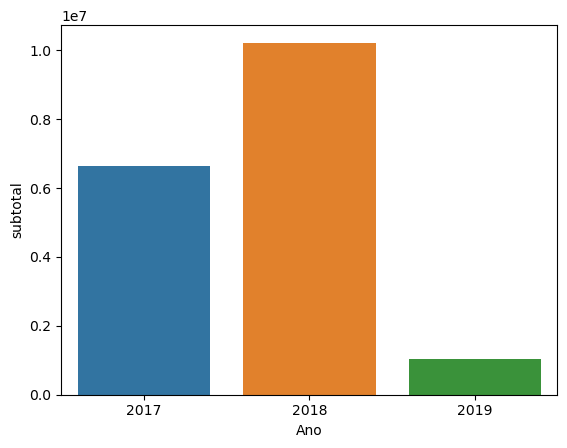

In [34]:
#   MESCLANDO AS TABELAS VENDAS E DATAS COM O PD.MERGE
df_result = pd.merge(
                     dfVendas[['DataEmissao', 'QtdItens','ValorUnitario']],
                     dfDatas[['Data', 'Ano']],
                     left_on='DataEmissao',
                     right_on='Data'   
                    )

# ADICIONAR A COLUNA SUBTOTAL AO DATAFRAME
df_result['subtotal'] = df_result['QtdItens'] * df_result['ValorUnitario']

# AGRUPAR OS DADOS POR ANO
df_result = df_result[['Ano','subtotal']].groupby('Ano').sum().reset_index()

# CRIAR O GRAFICO
sns.barplot(
    data=df_result,
    x = 'Ano',
    y = 'subtotal'
)